In [3]:
# # !IMPORTANT - to run this notebook download first Houses.csv dataset from https://www.kaggle.com/datasets/dawidcegielski/house-prices-in-poland and put it in same folder as for this notebook
# import libraries
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# import csv into pandas DataFrame
houses = pd.read_csv('Houses.csv',encoding = "ISO-8859-1")
houses = houses.sample(frac = 1)
houses.head(50)

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
20105,20105,Praga-Po³udnie ul. Jana Nowaka-Jeziorañskiego,Warszawa,1.0,7996.0,52.230700,21.105300,465900.00,2.0,45.04,2021.0
7352,7352,Nowe Miasto Malta,Poznañ,1.0,763.0,52.407393,16.979467,567150.00,4.0,76.51,2021.0
23354,23354,Wawer,Warszawa,0.0,7741.0,52.220358,21.137083,680000.00,3.0,75.00,2012.0
6320,6320,Bielany Kolektorska,Warszawa,1.0,9973.0,52.279942,20.964647,1249000.00,3.0,88.50,2008.0
104,104,Ursus,Warszawa,2.0,13586.0,52.196098,20.882899,799990.00,3.0,77.75,2007.0
4220,4220,Targówek,Warszawa,1.0,6914.0,52.275192,21.058085,399000.00,2.0,45.50,1980.0
9871,9871,Bia³o³êka Giuseppe Verdiego,Warszawa,1.0,7457.0,52.342219,21.055248,429000.00,2.0,46.70,2020.0
18327,18327,Wola Kolejowa,Warszawa,1.0,7515.0,52.225886,20.981349,942990.00,2.0,55.47,2020.0
9639,9639,Pr¹dnik Bia³y,Kraków,2.0,25979.0,50.103568,19.953603,325000.00,2.0,35.00,2020.0
16143,16143,Zwierzyniec Salwator,Kraków,2.0,20177.0,50.055002,19.908853,874000.00,2.0,56.00,2021.0


In [4]:
# analyze statistic data
print(houses.describe())
print(houses.info())
print(houses.isnull().values.any())

houses

         Unnamed: 0         floor            id      latitude     longitude  \
count  23764.000000  23764.000000  23764.000000  23764.000000  23764.000000   
mean   11881.500000      2.808744  15621.964484     51.374874     19.861773   
std     6860.220235      2.463467   8617.293898      1.099836      1.447186   
min        0.000000      0.000000      1.000000     49.933056      4.204796   
25%     5940.750000      1.000000   8420.750000     50.066489     19.916563   
50%    11881.500000      2.000000  15637.500000     52.193987     19.999330   
75%    17822.250000      4.000000  23111.250000     52.267594     20.996180   
max    23763.000000     10.000000  30308.000000     54.435238     30.319403   

              price         rooms            sq         year  
count  2.376400e+04  23764.000000  2.376400e+04  23764.00000  
mean   6.493536e+05      2.620771  1.027249e+02   2000.55117  
std    5.326970e+05      0.996530  6.533688e+03     48.31402  
min    5.000000e+03      1.000000  8

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
20105,20105,Praga-Po³udnie ul. Jana Nowaka-Jeziorañskiego,Warszawa,1.0,7996.0,52.230700,21.105300,465900.0,2.0,45.04,2021.0
7352,7352,Nowe Miasto Malta,Poznañ,1.0,763.0,52.407393,16.979467,567150.0,4.0,76.51,2021.0
23354,23354,Wawer,Warszawa,0.0,7741.0,52.220358,21.137083,680000.0,3.0,75.00,2012.0
6320,6320,Bielany Kolektorska,Warszawa,1.0,9973.0,52.279942,20.964647,1249000.0,3.0,88.50,2008.0
104,104,Ursus,Warszawa,2.0,13586.0,52.196098,20.882899,799990.0,3.0,77.75,2007.0
...,...,...,...,...,...,...,...,...,...,...,...
3434,3434,Bia³o³êka Tarchomin,Warszawa,1.0,13942.0,52.320693,20.970834,605000.0,3.0,99.00,2020.0
7409,7409,ródmiecie Powile,Warszawa,0.0,17199.0,52.242752,21.024019,750000.0,2.0,53.60,1965.0
2787,2787,Stare Miasto,Kraków,5.0,30087.0,50.059040,19.937168,2430000.0,3.0,100.30,1911.0
19657,19657,Bia³o³êka Berensona Leona,Warszawa,2.0,7106.0,52.324624,21.054760,399900.0,3.0,52.34,2021.0


<AxesSubplot:>

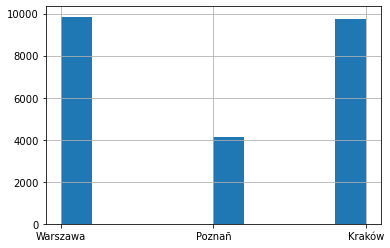

In [5]:
# cities distribution
houses['city'].hist() 

In [6]:
#Use one hot encoding to transform categorical values into boolean columns
cities = pd.get_dummies(houses['city'])
houses = pd.merge(
    left=houses,
    right=cities,
    left_index=True,
    right_index=True,
)
print(houses.head())

       Unnamed: 0                                        address      city  \
20105       20105  Praga-Po³udnie ul. Jana Nowaka-Jeziorañskiego  Warszawa   
7352         7352                              Nowe Miasto Malta    Poznañ   
23354       23354                                          Wawer  Warszawa   
6320         6320                            Bielany Kolektorska  Warszawa   
104           104                                          Ursus  Warszawa   

       floor       id   latitude  longitude      price  rooms     sq    year  \
20105    1.0   7996.0  52.230700  21.105300   465900.0    2.0  45.04  2021.0   
7352     1.0    763.0  52.407393  16.979467   567150.0    4.0  76.51  2021.0   
23354    0.0   7741.0  52.220358  21.137083   680000.0    3.0  75.00  2012.0   
6320     1.0   9973.0  52.279942  20.964647  1249000.0    3.0  88.50  2008.0   
104      2.0  13586.0  52.196098  20.882899   799990.0    3.0  77.75  2007.0   

       Kraków  Poznañ  Warszawa  
20105       0   

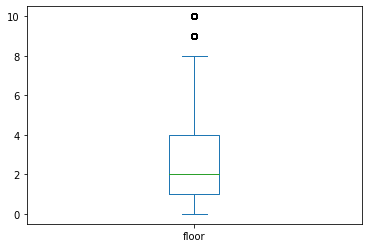

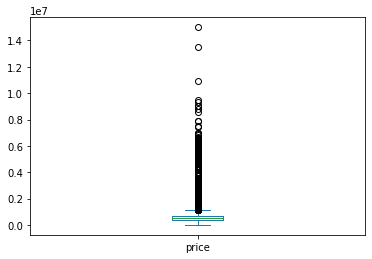

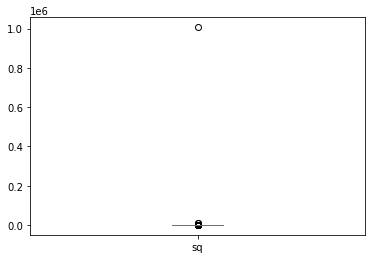

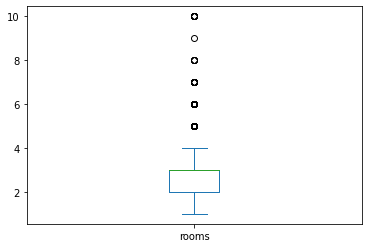

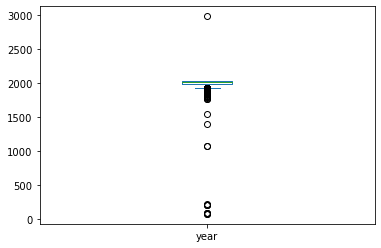

In [7]:
# data distribution on box plots
houses['floor'].plot(kind='box')
plt.show()
houses['price'].plot(kind='box')
plt.show()
houses['sq'].plot(kind='box') 
plt.show()
houses['rooms'].plot(kind='box') 
plt.show()
houses['year'].plot(kind='box')
plt.show()

In [8]:
# Removed not needed columns
del houses['address']
del houses['id']
del houses['Unnamed: 0']
del houses['city']
houses.head()

,floor,latitude,longitude,price,rooms,sq,year,Kraków,Poznañ,Warszawa
20105,1.0,52.230700,21.105300,465900.0,2.0,45.04,2021.0,0,0,1
7352,1.0,52.407393,16.979467,567150.0,4.0,76.51,2021.0,0,1,0
23354,0.0,52.220358,21.137083,680000.0,3.0,75.00,2012.0,0,0,1
6320,1.0,52.279942,20.964647,1249000.0,3.0,88.50,2008.0,0,0,1
104,2.0,52.196098,20.882899,799990.0,3.0,77.75,2007.0,0,0,1


In [9]:
#Remove outliers
houses = houses.drop(houses[houses.year < 1800].index)
houses = houses.drop(houses[houses.year > 2022].index)
houses = houses.drop(houses[houses.sq > 500].index)

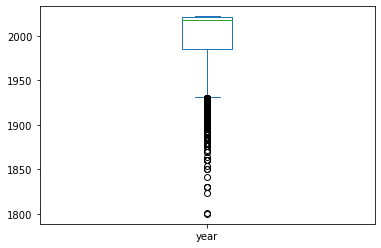

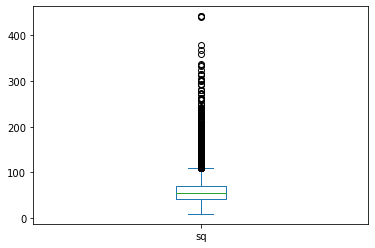

In [10]:
houses['year'].plot(kind='box')
plt.show()
houses['sq'].plot(kind='box')
plt.show()

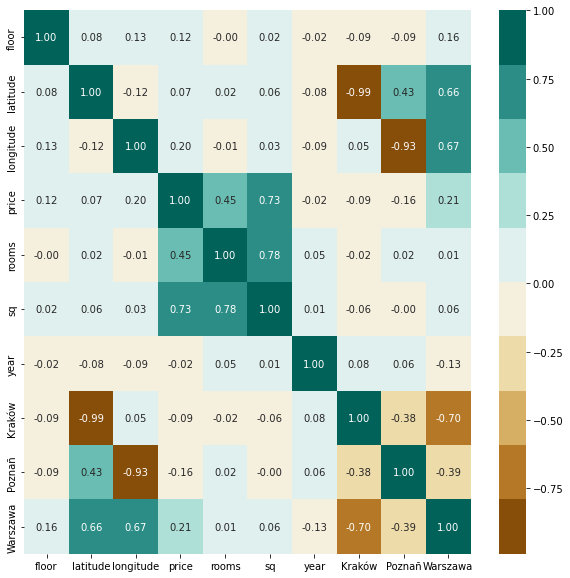

In [11]:
# Display correlation matrix

correlations = houses.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

plt.show()

In [12]:
# Prepare training set (all data without labels)
X = houses.drop('price', axis=1).to_numpy()
X

array([[ 1.        , 52.2307    , 21.1053    , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 52.40739345, 16.97946707, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , 52.2203581 , 21.1370825 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 5.        , 50.0590398 , 19.9371683 , ...,  1.        ,
         0.        ,  0.        ],
       [ 2.        , 52.3246245 , 21.0547602 , ...,  0.        ,
         0.        ,  1.        ],
       [ 9.        , 50.0587885 , 19.9500605 , ...,  1.        ,
         0.        ,  0.        ]])

In [13]:
# Prepare labels for training set
y = houses.loc[:, 'price'].to_numpy()
y

array([ 465900.,  567150.,  680000., ..., 2430000.,  399900., 1138590.])

In [14]:
# Split data to training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [15]:
# Universal method for training and evaluating different models

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    with open('titanic_classifier.pickle', 'wb') as handle:
        pickle.dump(classifier, handle)
    
    # generate predictions
    predictions = classifier.predict(feature_vector_valid)
    
    # evalueate model
    score_vals = [
        metrics.mean_squared_error(predictions, y_test),
        metrics.mean_absolute_error(predictions, y_test)
    ]
    return score_vals

In [16]:
# MODEL 1 - Linear regression
accuracy = train_model(linear_model.LinearRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

# MODEL 2 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

LR:  [120289418687.3478, 160021.1508840116]
random forrest tree [42034911714.53631, 69104.5077617815]


<AxesSubplot:>

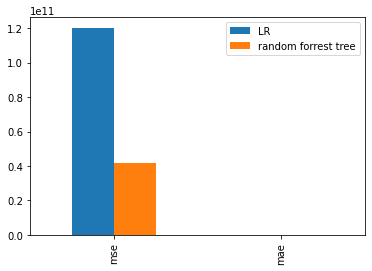

In [17]:
# compare models

df_compare = pd.DataFrame(accuracy_compare, index = ['mse', 'mae'])
df_compare.plot(kind='bar')

In [18]:
# Test manually prediction
regressor.predict([[2.0, 50.049224, 19.970379, 3.0, 74.05, 2021.0, 1, 0, 0]]) #prawidłowa wartość 749000.0

array([748500.])

In [19]:
# Correction - try adjust model hyperparameters

# MODEL 3 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

random forrest tree [43671388377.08196, 68794.03887463921]
